# Use Tensorflow to train a model to predict numbers from MNIST dataset

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


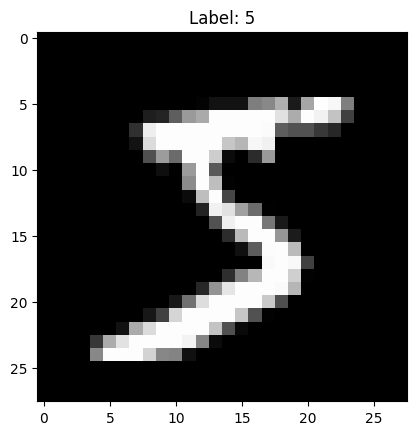

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets
import numpy as np
import matplotlib.pyplot as plt

# Tải dữ liệu MNIST
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

# Kiểm tra kích thước
print("x_train shape:", x_train.shape)  # (60000, 28, 28)
print("y_train shape:", y_train.shape)  # (60000,)
print("x_test shape:", x_test.shape)    # (10000, 28, 28)
print("y_test shape:", y_test.shape)    # (10000,)

# Hiển thị một ảnh mẫu
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

In [2]:
# Chuẩn hóa giá trị pixel về khoảng [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Chuyển đổi nhãn thành one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Kiểm tra lại
print("x_train shape:", x_train.shape)  # (60000, 28, 28)
print("y_train shape:", y_train.shape)  # (60000, 10)

x_train shape: (60000, 28, 28)
y_train shape: (60000, 10)


In [10]:
from tensorflow.keras import models, layers

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation ='relu'),
    layers.Dense(10, activation='softmax')
])
# Reshape dữ liệu trước khi huấn luyện
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Biên dịch mô hình
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Xem tóm tắt mô hình
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_3 (Dense)             (None, 128)              

In [11]:
# Huấn luyện
history = model.fit(x_train, y_train, 
                    epochs=10, 
                    batch_size=128, 
                    validation_split=0.2)

# Đánh giá trên tập kiểm tra
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"\nĐộ chính xác trên tập kiểm tra: {test_accuracy:.4f}")

Epoch 1/10
375/375 [==============================] - 14s 36ms/step - loss: 0.2298 - accuracy: 0.9333 - val_loss: 0.0842 - val_accuracy: 0.9744
Epoch 2/10
375/375 [==============================] - 12s 33ms/step - loss: 0.0634 - accuracy: 0.9801 - val_loss: 0.0599 - val_accuracy: 0.9822
Epoch 3/10
375/375 [==============================] - 14s 36ms/step - loss: 0.0448 - accuracy: 0.9862 - val_loss: 0.0462 - val_accuracy: 0.9853
Epoch 4/10
375/375 [==============================] - 25s 66ms/step - loss: 0.0339 - accuracy: 0.9896 - val_loss: 0.0492 - val_accuracy: 0.9862
Epoch 5/10
375/375 [==============================] - 20s 53ms/step - loss: 0.0253 - accuracy: 0.9920 - val_loss: 0.0384 - val_accuracy: 0.9882
Epoch 6/10
375/375 [==============================] - 20s 54ms/step - loss: 0.0206 - accuracy: 0.9940 - val_loss: 0.0444 - val_accuracy: 0.9868
Epoch 7/10
375/375 [==============================] - 21s 56ms/step - loss: 0.0162 - accuracy: 0.9946 - val_loss: 0.0442 - val_accuracy:

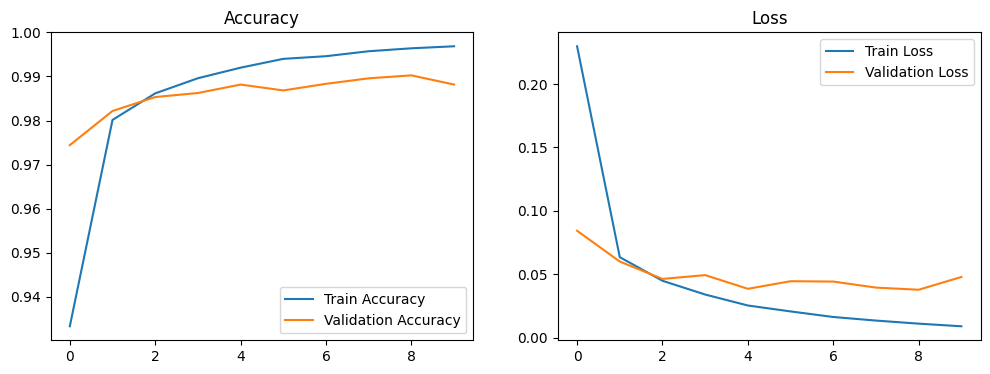

In [12]:
# Vẽ đồ thị
plt.figure(figsize=(12, 4))

# Độ chính xác
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

# Hàm mất mát
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()

1/1 [==============================] - 0s 49ms/step


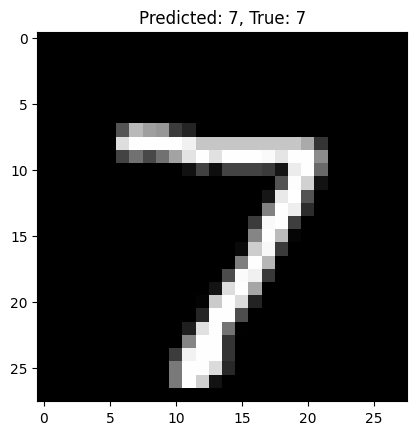

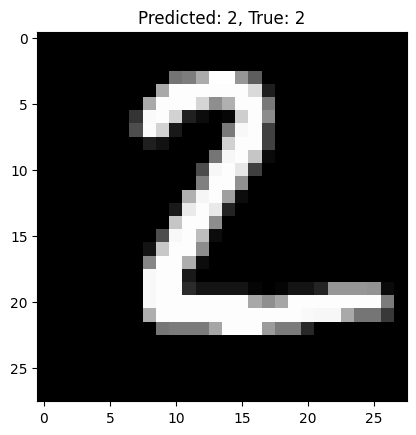

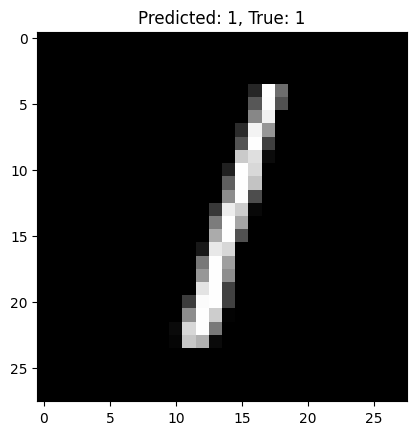

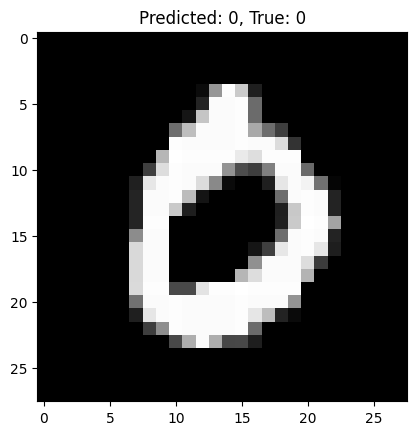

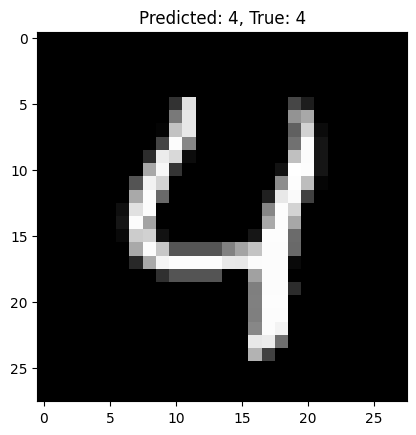

In [13]:
# Dự đoán
predictions = model.predict(x_test[:5])

# Hiển thị kết quả
for i in range(5):
    predicted_label = np.argmax(predictions[i])
    true_label = np.argmax(y_test[i])
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Predicted: {predicted_label}, True: {true_label}")
    plt.show()

In [14]:
# Lưu mô hình
model.save('mnist_model_2.h5')

# Tải lại mô hình (nếu cần)
# model = tf.keras.models.load_model('mnist_model.h5')

In [8]:
# model = models.Sequential([
#     layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Flatten(),
#     layers.Dense(128, activation lini='relu'),
#     layers.Dense(10, activation='softmax')
# ])
# # Reshape dữ liệu trước khi huấn luyện
# x_train = x_train.reshape(-1, 28, 28, 1)
# x_test = x_test.reshape(-1, 28, 28, 1)